In [7]:
import pandas as pd
import pandahouse as ph
import seaborn as sns
import scipy as sp
import numpy as np

In [8]:
connection = {'host': 'http://clickhouse.beslan.pro:8080',
                      'database':'simulator',
                      'user':'student', 
                      'password':'dpo_python_2020'
                     }

In [9]:
q = """
SELECT exp_group, 
    user_id,
    sum(action = 'like') as likes,
    sum(action = 'view') as views,
    likes/views as ctr
FROM simulator_20221020.feed_actions 
WHERE toDate(time) between '2022-09-26' and '2022-10-02'
    and exp_group in (2,3)
GROUP BY exp_group, user_id
"""

df = ph.read_clickhouse(q, connection=connection)

df.groupby('exp_group').count()

,user_id,likes,views,ctr
exp_group,,,,
2,8480,8480,8480,8480
3,8569,8569,8569,8569


In [10]:
df

,exp_group,user_id,likes,views,ctr
0,3,115383,11,36,0.305556
1,3,123580,15,92,0.163043
2,2,131473,26,148,0.175676
3,2,23985,12,66,0.181818
4,2,24523,17,120,0.141667
...,...,...,...,...,...
17044,3,122008,4,31,0.129032
17045,2,25383,16,57,0.280702
17046,3,122190,25,74,0.337838
17047,2,108927,8,33,0.242424


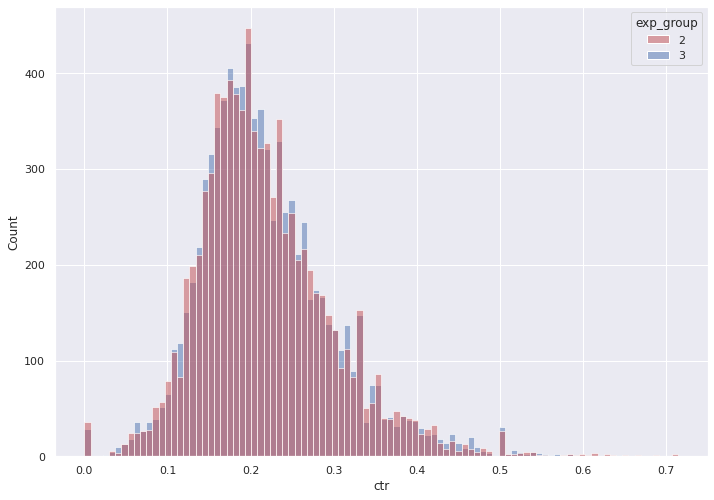

In [11]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

groups = sns.histplot(data = df, 
              x='ctr', 
              hue='exp_group', 
              palette = ['r', 'b'],
              alpha=0.5,
              kde=False)

In [12]:
sp.stats.ttest_ind(df[df.exp_group == 2].ctr,
                df[df.exp_group == 3].ctr,
                equal_var=False)

Ttest_indResult(statistic=-0.7393597924958364, pvalue=0.45969873156476293)

In [13]:
pvalue_df=pd.DataFrame()
shape=10000
samplesize=500
plist=[]
for _ in range(shape):
    gr2=df[df.exp_group == 2].ctr.sample(samplesize,replace=False)
    gr3=df[df.exp_group == 3].ctr.sample(samplesize,replace=False)
    pval=sp.stats.ttest_ind(gr2,
                gr3,
                equal_var=False)
    plist.append(pval[1])



In [14]:
pvalue_df=pd.DataFrame(plist,columns=['pvalues'])

In [15]:
pvalue_df

,pvalues
0,0.294476
1,0.954230
2,0.579072
3,0.641755
4,0.145909
...,...
9995,0.805763
9996,0.032611
9997,0.473128
9998,0.729767


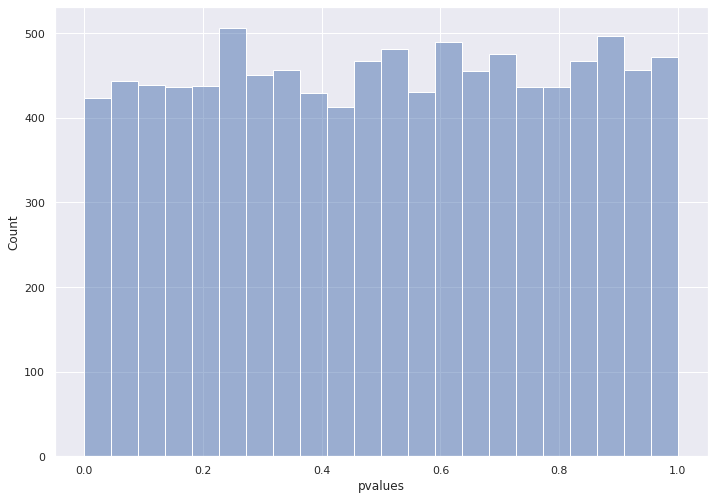

In [16]:
groups = sns.histplot(data = pvalue_df, 
              x='pvalues',  
              palette = ['r', 'b'],
              alpha=0.5,
              kde=False)

In [17]:
perc_05=pvalue_df\
    .query('pvalues<0.05').size /10_000*100
print('Процент значений pvalue ниже 0.05: ', perc_05,'%')

Процент значений pvalue ниже 0.05:  4.68 %


Система сплитования работает корректно. По значениям pvalue нельзя сделать вывод о пристутсвии различий.